Palabras más frecuentes:
de: 36
la: 25
y: 19
en: 16
el: 15
su: 12
a: 12
cobain: 8
por: 8
con: 8
una: 7
que: 7
se: 7
como: 7
del: 6
un: 6
mas: 5
musica: 4
lo: 4
los: 4
nirvana: 4
sus: 3
letras: 3
fue: 3
banda: 3
album: 3
exito: 3
las: 3
tambien: 3
kurt: 2


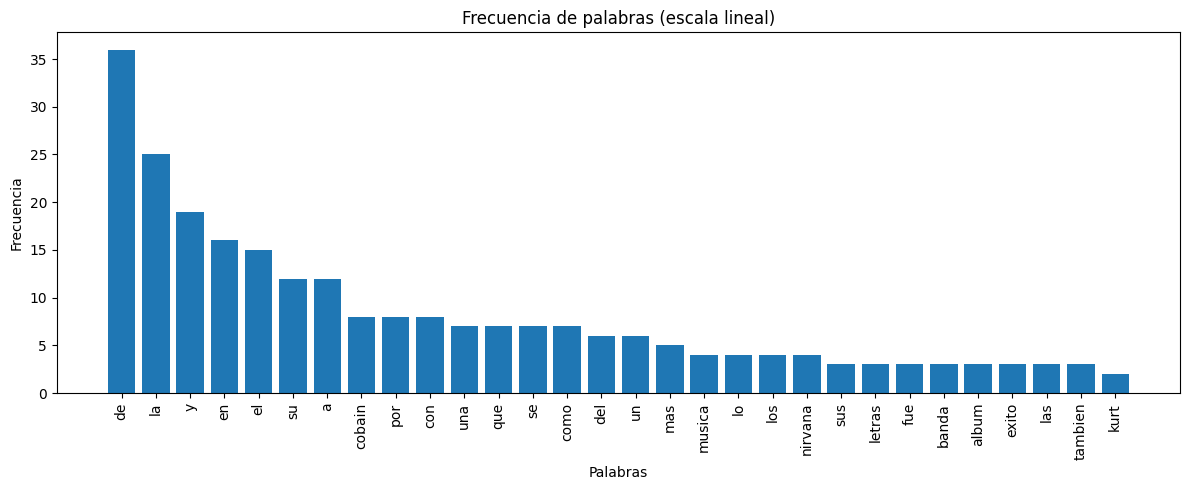

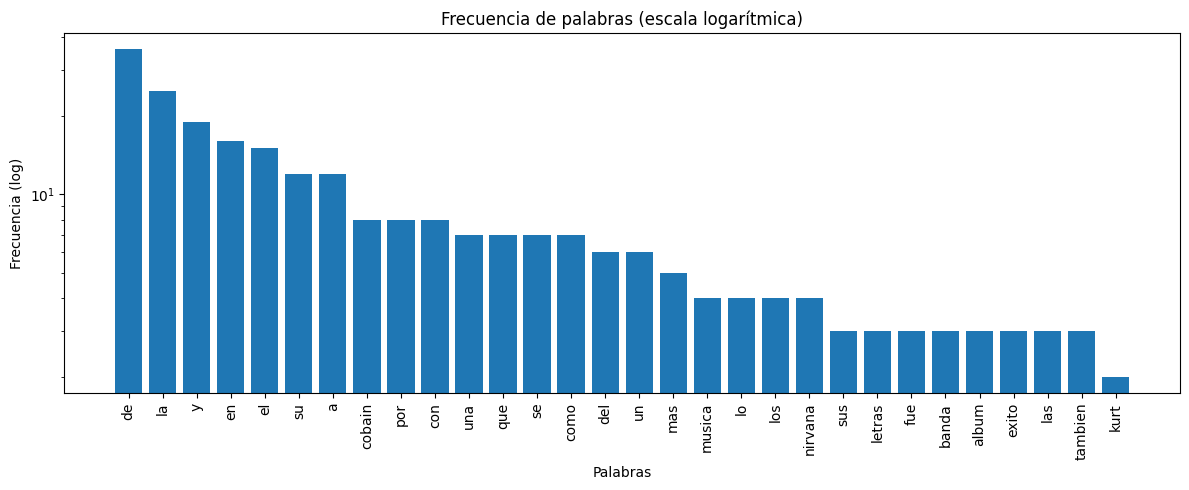

In [9]:
import matplotlib.pyplot as plt

# Defino carácteres que quiero eliminar del texto
caracteres = [',', '.', '!', '?', '¿', '¡', ':', ';', '-', '_', '(', ')', '[', ']', '{', '}', "'", '"']

def leerDocumentos(documento): # Lee el documento que le pase
    contenido_total = ""
    with open(documento, "r") as f:
        contenido_total = f.read()
    return contenido_total

def eliminar_caracteres_especiales(texto):
    for caracter in caracteres:
        texto = texto.replace(caracter, ' ')
    return texto

def eliminar_acentos(texto):
    acentos = {
        'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u'
    }
    for acento, sin_acento in acentos.items():
        texto = texto.replace(acento, sin_acento)
    return texto

def tokenize(s):
    tokens = []
    word = ''
    for char in s:
        if char != ' ':
            word += char
        else:
            if word:
                tokens.append(word)
                word = ''
    if word:
        tokens.append(word)
    return tokens

def normalizar_texto(texto):
    texto = texto.lower()  
    texto = eliminar_caracteres_especiales(texto) 
    texto = eliminar_acentos(texto) 
    texto = texto.split()
    return texto

def crearDiccionario(texto_normalizado):
    diccionario = {}
    for palabra in texto_normalizado:
        if palabra in diccionario:
            diccionario[palabra] += 1
        else:
            diccionario[palabra] = 1
    return diccionario

def palabras_mas_frecuentes(texto_normalizado, n):
    diccionario = crearDiccionario(texto_normalizado)
    palabras_ordenadas = sorted(diccionario.items(), key=lambda palabra_total: palabra_total[1], reverse=True)
    return palabras_ordenadas[:n]

def graficar_frecuencias(palabras_frecuencia):
    palabras, frecuencias = zip(*palabras_frecuencia)

    # Escala lineal
    plt.figure(figsize=(12, 5))
    plt.bar(palabras, frecuencias)
    plt.xticks(rotation=90)
    plt.title("Frecuencia de palabras (escala lineal)")
    plt.xlabel("Palabras")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

    # Escala logarítmica
    plt.figure(figsize=(12, 5))
    plt.bar(palabras, frecuencias)
    plt.yscale("log")
    plt.xticks(rotation=90)
    plt.title("Frecuencia de palabras (escala logarítmica)")
    plt.xlabel("Palabras")
    plt.ylabel("Frecuencia (log)")
    plt.tight_layout()
    plt.show()




texto = leerDocumentos("./ArchivoTexto.txt")
texto_normalizado = normalizar_texto(texto)
print("Palabras más frecuentes:")
palabras_frecuentes = palabras_mas_frecuentes(texto_normalizado, 30)
for palabra, frecuencia in palabras_frecuentes:
    print(f"{palabra}: {frecuencia}")
graficar_frecuencias(palabras_frecuentes)

